### Importing Essential Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns  
from scipy import stats
from scipy.stats import norm, skew 

### Importing Dataset

In [2]:
data = pd.read_csv('NFL.csv') 

### Analyzing the Response Variable (Win Probability) 

Deleting the records with null response 

In [3]:
data = data[np.isfinite(data['Win_Prob'])] 

In [4]:
data.shape

(382679, 102)

Checking for normality Assumption 


 mu = 0.50 and sigma = 0.29



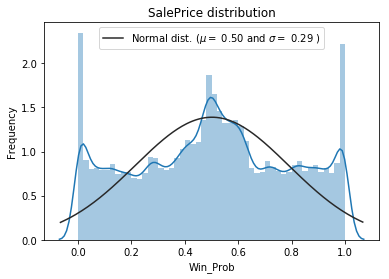

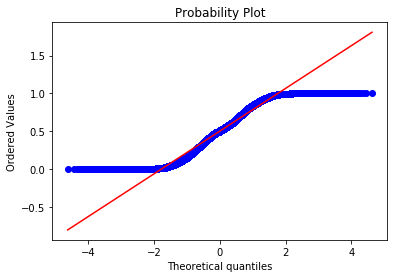

In [5]:
sns.distplot(data['Win_Prob'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Win_Prob'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Win_Prob'], plot=plt)
plt.show() 

Log Transformation of Response 


 mu = 0.39 and sigma = 0.20



Text(0.5,1,'SalePrice distribution')

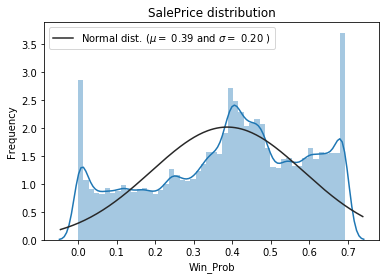

In [6]:
data['Win_Prob'] = np.log1p(data['Win_Prob'])

sns.distplot(data['Win_Prob'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Win_Prob'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


### Null Value Analysis 

In [7]:
percentage = pd.DataFrame((data.isnull().sum()/len(data))*100) 

Deleting all columns with more than 30% missing values 

In [8]:
a=percentage[percentage[0]<30] 

In [9]:
index = a.index.values 

In [10]:
df = data[index] 

In [11]:
df.shape 

(382679, 72)

Deleting all records with any missing values. (Taking leverage of the Big Data) 

In [12]:
df = df.dropna(how = 'any', axis=0)

In [13]:
df.shape

(345007, 72)

### Categorical Features Engineering 

In [14]:
CGData = df.select_dtypes(exclude = ['int64','float64'])
print(CGData.shape)
CGData.head()

(345007, 13)


,Date,time,SideofField,posteam,DefensiveTeam,desc,PlayType,Passer_ID,Rusher_ID,Receiver_ID,HomeTeam,AwayTeam,Timeout_Team
1,2009-09-10,14:53,PIT,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,Pass,00-0022924,None,00-0017162,PIT,TEN,None
2,2009-09-10,14:16,PIT,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,Run,None,00-0022250,None,PIT,TEN,None
3,2009-09-10,13:35,PIT,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,Pass,00-0022924,None,00-0026901,PIT,TEN,None
4,2009-09-10,13:27,PIT,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,Punt,None,None,None,PIT,TEN,None
5,2009-09-10,13:16,TEN,TEN,PIT,(13:16) C.Johnson up the middle to TEN 2 for n...,Run,None,00-0026164,None,PIT,TEN,None


Dropping all the columns which has very little impact on the response 

In [15]:
CGData.drop(['Date', 'time', 'desc', 'Passer_ID', 'Rusher_ID', 'Receiver_ID', 'Timeout_Team'], axis=1, inplace = True) 
CGData.head()

,SideofField,posteam,DefensiveTeam,PlayType,HomeTeam,AwayTeam
1,PIT,PIT,TEN,Pass,PIT,TEN
2,PIT,PIT,TEN,Run,PIT,TEN
3,PIT,PIT,TEN,Pass,PIT,TEN
4,PIT,PIT,TEN,Punt,PIT,TEN
5,TEN,TEN,PIT,Run,PIT,TEN


Creating Dummies 

In [16]:
dummies = pd.get_dummies(CGData)
print(dummies.shape)

(345007, 187)


### Numerical Features 

In [17]:
Numerical = df.select_dtypes(exclude = ['object'])
print(Numerical.shape)
Numerical.head() 

(345007, 59)


,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
1,2009091000,1,1,1.0,15,3593.0,7.0,42.0,58.0,10,...,0.0,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.435951,0.004655,2009
2,2009091000,1,1,2.0,15,3556.0,37.0,47.0,53.0,5,...,0.0,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.438957,-0.040295,2009
3,2009091000,1,1,3.0,14,3515.0,41.0,44.0,56.0,8,...,0.0,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.412635,-0.049576,2009
4,2009091000,1,1,4.0,14,3507.0,8.0,44.0,56.0,8,...,0.0,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.379270,0.097712,2009
5,2009091000,2,1,1.0,14,3496.0,11.0,2.0,98.0,10,...,0.0,-1.398360,-0.696302,0.558929,0.441071,0.578453,0.421547,0.365386,-0.019524,2009


### Concating to form the final matrix

In [18]:
df = pd.concat([dummies,Numerical], axis=1)
df.head() 

,SideofField_ARI,SideofField_ATL,SideofField_BAL,SideofField_BUF,SideofField_CAR,SideofField_CHI,SideofField_CIN,SideofField_CLE,SideofField_DAL,SideofField_DEN,...,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
1,0,0,0,0,0,0,0,0,0,0,...,0.0,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.435951,0.004655,2009
2,0,0,0,0,0,0,0,0,0,0,...,0.0,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.438957,-0.040295,2009
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.412635,-0.049576,2009
4,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.379270,0.097712,2009
5,0,0,0,0,0,0,0,0,0,0,...,0.0,-1.398360,-0.696302,0.558929,0.441071,0.578453,0.421547,0.365386,-0.019524,2009


In [20]:
df.shape

(345007, 246)

### Grouping by GameID. As our objective is to find the Win Probability of all each Game 

In [21]:
df = df.groupby('GameID').mean() 

In [22]:
df.shape

(2304, 245)

### Feature Selection 

Correlation Matrix

In [23]:
Cor = df.corr() 

Features only with atleast 0.05 or more correlation with the response variable are choosen. 

In [24]:
b = pd.DataFrame(abs(Cor['Win_Prob'])>0.05).astype(int)  

In [25]:
Predictors = []
for index, row in b.iterrows():
    if row['Win_Prob'] == 1: 
        Predictors.append(index)  

In [26]:
Data = df[Predictors] 

Final Data 

In [27]:
Data.shape 

(2304, 36)

### Fixing our Predictors and Response 

In [28]:
Y = Data['Win_Prob'] 

In [37]:
X = Data.drop('Win_Prob', axis=1) 

In [30]:
X= pd.DataFrame(X)
X.shape

(2304, 35)

 Scaling of Predictors 

In [31]:
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler() 
X= Scale.fit_transform(X) 

### Train Test Split 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

### XG Boost 

In [33]:
import xgboost 
xgb = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)

In [34]:
xgb.fit(X_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [35]:
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import r2_score
y_pred = xgb.predict(X_test)
print(r2_score(y_pred,y_test)) 

0.9010736840385238


### Regularization Models 

Ridge Regression 

In [36]:
from sklearn.linear_model import Ridge, Lasso
ridge2 = Ridge(alpha=0.01)
ridge2.fit(X_train, y_train)
y_pred = ridge2.predict(X_test)
print(r2_score(y_pred,y_test)) 

0.8670604246543564


### Applying PCA 

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 20)
pca.fit(X)
X = pca.fit_transform(X)

In [40]:
X.shape

(2304, 20)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

In [42]:
xgb.fit(X_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [43]:
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import r2_score
y_pred = xgb.predict(X_test)
print(explained_variance_score(y_pred,y_test)) 

0.8567809603047959


### Conclusion 

Achieved a R2 Score of 0.901 using XGBoost model and a R2score of 0.867 using Rigde Regularization model. Applying PCA achieved a R2 score of 0.856.  